In [1]:
#import statements
import numpy as np
import matplotlib.pyplot as plt
import os
from time import perf_counter
import subprocess
#from scipy.stats import linregress
from scipy.optimize import curve_fit


In [2]:
#variables
WORKING_IP = "192.168.114.10" #CLARA SP1
 # Number of shots

In [3]:
VIRTUAL = False

if VIRTUAL:
    os.environ['EPICS_CA_ADDR_LIST'] = ''
    os.environ['EPICS_CA_SERVER_PORT'] = ''
    vm = 'VM-'
else:
    os.environ['EPICS_CA_ADDR_LIST'] = "192.168.83.255 192.168.119.255 192.168.125.50 129.168.125.51 192.168.125.52 192.168.125.59 192.168.125.54 192.168.125.58 192.168.125.57 192.168.125.130 192.168.113.29"
    vm = ''

os.environ['EPICS_CA_AUTO_ADDR_LIST'] = 'NO'
os.environ['EPICS_CA_MAX_ARRAY_BYTES'] = '10000000'

import epics

In [5]:
# Data storage class

class data_store: 
    def __init__(self, n, PVName):
        self.storage_vector = np.zeros((n, 1)) 
        self.pvo = epics.PV(PVName)

    def start(self):
        self.pvo.add_callback(self.on_new_value)
    
    def stop(self):
        self.pvo.clear_callbacks()

    def on_new_value(self, pvname, value, **kws): 
        print(f'{pvname} -> {value}')
        self.storage_vector = np.roll(self.storage_vector, -1) 
        self.storage_vector[-1] = value 

    def _test(self, n):
        for i in range(n):
            self.on_new_value("Test", i)

In [6]:
def set_calibration_level(sensitivity, calibration, calibration_level, IP):
    #this function will set the calibration level to talk to the front end
    run_arg = f'./dist/chg_fe_cli.exe -s {sensitivity} -c {calibration} -l {calibration_level} {IP}'
    out = subprocess.run(run_arg, capture_output=True)
    return 0

In [8]:
def retrieve_data_from_epics():
    # this function will get the data from epics, will probably have some sort of data array in it
    n = 100
    PVName = f'{vm}CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg' 
    ds = data_store(n, PVName) 
    start = perf_counter() 
    ds.start()
    while perf_counter() - start < 2: 
        pass
    ds.stop()
    return ds

In [9]:
def statistics(data_array):
    #calculate the mean and standard deviation of the output and store them
    mean = np.mean(data_array.storage_vector)
    std = np.std(data_array.storage_vector)
    return mean, std

In [10]:
def linear_function(x, m, c):
    return (m*x) + c

In [11]:
def fitting(x_data, y_data, y_err):
    
    popt, pcov = curve_fit(linear_function, x_data, y_data, sigma = y_err)
    m, c = popt[0], popt[1]
    errs = np.sqrt(np.diag(pcov))
    m_err, c_err = errs[0], errs[1]

    return [m, m_err, c, c_err]
    
    

In [ ]:
def harry_plotter(x_data, y_data, y_unc, fitting_params, sensitivity):

    figure = plt.figure(figsize = (8,6))
    axes1 = plt.subplot(111)
    axes1.errorbar(x_data, y_data, y_unc, fmt = 'gx', label = 'Data')
    
    fit_y = linear_function(x_data, fitting_params[0], fitting_params[2])
    axes1.plot(x_data, fit_y, c = 'k', linestyle = '--', label = 'Fit')
    axes1.set_title(f'Graph for sensitvity {sensitivity}')
    plt.legend()
    plt.show()
    return 0

CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.5031168454379233
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.238804548127571
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.4277286522121855
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.028987299036006
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.3328335042898791
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.5639542611561177
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 0.9215944883708937
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.570641594909727
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.3477126370578674
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.7877553093372516
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.4740855869648721
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.1749940472825264
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.7806855202526946
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.5440555577346042
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Powe

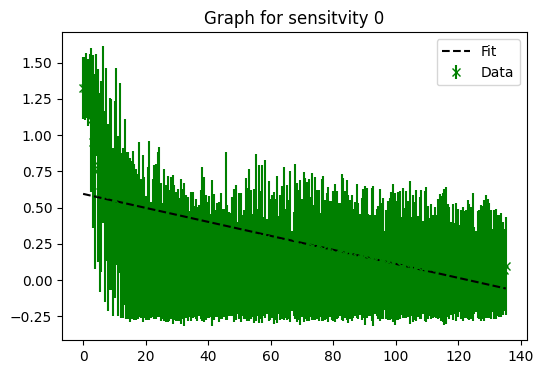

CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.177352649936656
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.7749247641662576
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.2384646112953621
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 0.9813858132267504
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 0.9190263953927674
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 0.9602665434103347
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.662144615021284
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 0.8787982546291531
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.299907506542919
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.2568176547297236
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.2425318427812881
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.1575273217351931
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.3456954704721682
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.3390968007186972
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Powe

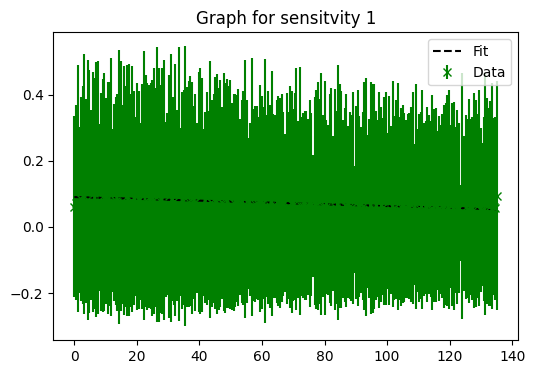

CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.17307187595825
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.32234987806255
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.2369230125615644
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.3149851267598958
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.4779211914244463
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.2946028623731598
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.5537872535279311
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.0954808682429873
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.6215193912535213
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.2252600146657835
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.8872212298330082
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.5951812887997372
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.7879321971191828
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.5666761044687973
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power

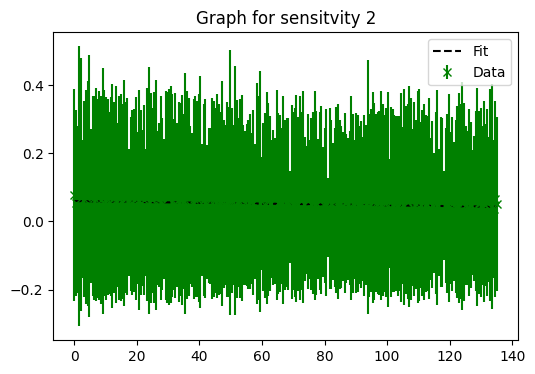

CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.1702522726483295
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.0181509637889214
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 0.871325527837106
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.2915075228069521
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.3309895220409007
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.3208129214832738
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.7021715709577137
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 0.8517504096867617
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.3976424459379668
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.379177283350711
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.4078529803362907
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.0303438141559231
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.1388483262049147
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Power:Wnd:Avg -> 1.233208459077498
CLA-GUNS-LRF-CTRL-01:PID:ad1:ch3:Powe

c:\Users\fsx88674\Documents\git\clara-chg-calibration\.conda\lib\site-packages\scipy\optimize\_minpack_py.py:982: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma
C:\Users\fsx88674\AppData\Local\Temp\ipykernel_18844\432324770.py:3: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(linear_function, x_data, y_data, sigma = y_err)


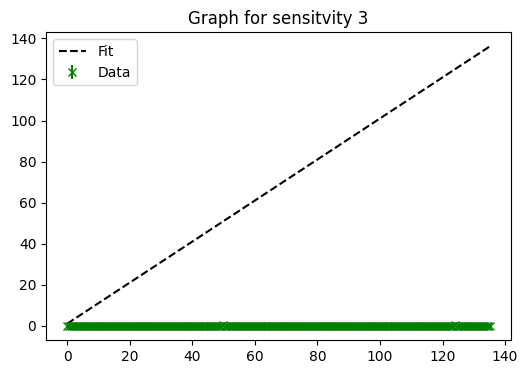

In [13]:
#for loop which loops through the range of sensitivities

for sen in range(4): # Loop through the desired sensitvities
    charge = [] # Create empty lists for the data. Lists are easier to append values to compared to arrays
    voltage = []
    voltage_unc = []
    
    
    for cal_lvl in range(256): # Loop through the calibration levels
        
        set_calibration_level(sen, 1, cal_lvl, WORKING_IP) # Set the calibration level
        ds = retrieve_data_from_epics() # Take 100 shots and produce 1-dimensional data array with 100 values
        mean, std = statistics(ds) # Find the mean and std of the data array

        Q_pc = 2.048 * 66 * (cal_lvl / 255) # calculate charge in pC from the calibration level
        voltage.append(mean) # Append the data to the lists created
        voltage_unc.append(std)
        charge.append(Q_pc)

    charge = np.array(charge) # Turn the lists into arrays as I find it easier for fitting/plotting
    voltage = np.array(voltage)
    voltage_unc = np.array(voltage_unc)

    fit_params = fitting(charge, voltage, voltage_unc) # perform a least squares linear fit and return fit parameters with uncertainties

    harry_plotter(charge, voltage, voltage_unc, fit_params, sen) # Plot the data, the fit (and the residuals eventually)
    
    
    #make sure that everything is saved in an appropriate manner, is legible and in an appropriate location

